In [4]:
#transfer learning model using https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4
#resource: https://www.tensorflow.org/tutorials/images/transfer_learning_with_hub

from __future__ import absolute_import, division, print_function, unicode_literals
import matplotlib.pylab as plt
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np
import PIL.Image as Image
from tensorflow.keras import layers

#load the data
#google's imagenet model expects 224 by 224 by 3 inputs so we need to resize
dim = (224, 224)
data_path = "./dataset/Images"
engine_images = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255)
training_images = engine_images.flow_from_directory(str(data_path), target_size=dim)

Found 20580 images belonging to 120 classes.


In [39]:
#create neural network
#resource https://www.tensorflow.org/api_docs/python/tf/keras/Model

mobilenet = hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4",
                                                                                     input_shape=(224,224,3))
mobilenet.trainable = False #dont train the pretrained model

#create our complete NN with mobilenet connected new layer for our dog classes
model = tf.keras.Sequential([mobilenet, layers.Dense(training_images.num_classes, activation='softmax')])
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_6 (KerasLayer)   (None, 1280)              2257984   
_________________________________________________________________
dense_6 (Dense)              (None, 120)               153720    
Total params: 2,411,704
Trainable params: 153,720
Non-trainable params: 2,257,984
_________________________________________________________________


In [40]:
#training the new model
#resource: https://www.tensorflow.org/api_docs/python/tf/keras/optimizers
#resource: https://www.tensorflow.org/api_docs/python/tf/keras/losses

model.compile(optimizer=tf.keras.optimizers.Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

num_batches = np.ceil(training_images.samples/training_images.batch_size) #default batch size is 32 images

_ = model.fit(training_images, epochs=10, steps_per_epoch=num_batches)

  ...
    to  
  ['...']


  ...
    to  
  ['...']


Train for 644.0 steps
Epoch 1/10
644/644 [==============================] - 407s 633ms/step - loss: 1.0499 - accuracy: 0.7248
Epoch 2/10
644/644 [==============================] - 405s 629ms/step - loss: 0.4202 - accuracy: 0.8687
Epoch 3/10
644/644 [==============================] - 411s 638ms/step - loss: 0.2846 - accuracy: 0.9156
Epoch 4/10
644/644 [==============================] - 407s 632ms/step - loss: 0.2072 - accuracy: 0.9416
Epoch 5/10
644/644 [==============================] - 403s 627ms/step - loss: 0.1511 - accuracy: 0.9617
Epoch 6/10
644/644 [==============================] - 455s 706ms/step - loss: 0.1167 - accuracy: 0.9739
Epoch 7/10
644/644 [==============================] - 442s 687ms/step - loss: 0.0897 - accuracy: 0.9815
Epoch 8/10
644/644 [==============================] - 425s 660ms/step - loss: 0.0709 - accuracy: 0.9872
Epoch 9/10
644/644 [==============================] - 403s 626ms/step - loss: 0.0567 - accuracy: 0.9910
Epoch 10/10
644/644 [=====================

In [42]:
#save the model for later use without having to retrain
#takes about 7 minutes per epoch on my machine

#format for saved model folder name: dog_[optimizer]_[cost/loss function]_[num epochs]
#99.22% accuracy on training images
#model.save("./models/dog_adam_cc_10/", save_format='tf') #if you rerun training, please change the path so it doesn't overwrite this one

#example of how to reload: saved_model= tf.keras.models.load_model("./models/dog_adam_cc_10/")

INFO:tensorflow:Assets written to: ./models/dog_adam_cc_10/assets


INFO:tensorflow:Assets written to: ./models/dog_adam_cc_10/assets


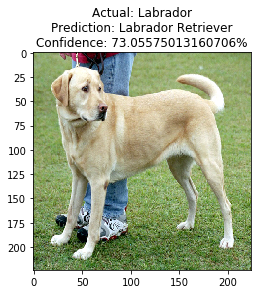

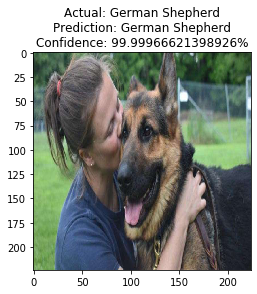

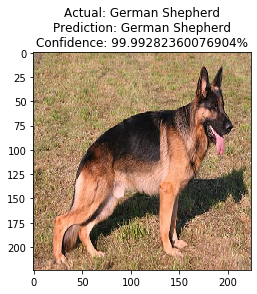

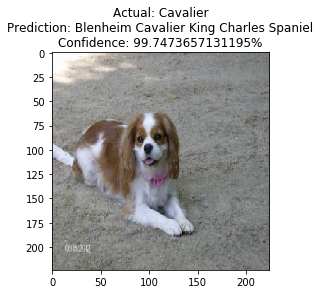

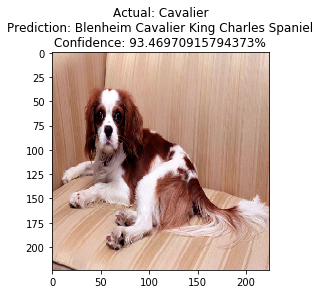

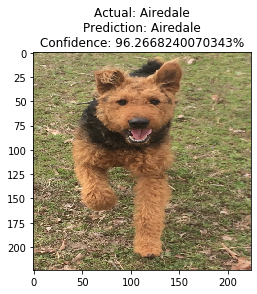

In [5]:
model = tf.keras.models.load_model("./models/dog_adam_cc_10/")

#test the newly trained model on test images
breeds = sorted(training_images.class_indices.items(), key=lambda pair:pair[1])
breeds = np.array([breed.title() for breed, val in breeds])

#labrador
plt.figure()
test_image=Image.open("./test_images/labrador.jpg").resize(dim)
test_image = np.array(test_image)/255.0
outputs = model.predict(test_image[np.newaxis, ...])
prediction = breeds[np.argmax(outputs[0], axis=-1)]
plt.imshow(test_image)
_=plt.title("Actual: Labrador"+"\nPrediction: " + prediction.title()+"\nConfidence: "+str(outputs[0][np.argmax(outputs[0], axis=-1)]*100)+"%")

#shepherd
plt.figure()
test_image=Image.open("./test_images/shepherd.jpg").resize(dim)
test_image = np.array(test_image)/255.0
outputs = model.predict(test_image[np.newaxis, ...])
prediction = breeds[np.argmax(outputs[0], axis=-1)]
plt.imshow(test_image)
_=plt.title("Actual: German Shepherd"+"\nPrediction: " + prediction.title()+"\nConfidence: "+str(outputs[0][np.argmax(outputs[0], axis=-1)]*100)+"%")

#shepherd 2
plt.figure()
test_image=Image.open("./test_images/shepherd2.jpg").resize(dim)
test_image = np.array(test_image)/255.0
outputs = model.predict(test_image[np.newaxis, ...])
prediction = breeds[np.argmax(outputs[0], axis=-1)]
plt.imshow(test_image)
_=plt.title("Actual: German Shepherd"+"\nPrediction: " + prediction.title()+"\nConfidence: "+str(outputs[0][np.argmax(outputs[0], axis=-1)]*100)+"%")

#cavalier
plt.figure()
test_image=Image.open("./test_images/cavalier.jpg").resize(dim)
test_image = np.array(test_image)/255.0
outputs = model.predict(test_image[np.newaxis, ...])
prediction = breeds[np.argmax(outputs[0], axis=-1)]
plt.imshow(test_image)
_=plt.title("Actual: Cavalier"+"\nPrediction: " + prediction.title()+"\nConfidence: "+str(outputs[0][np.argmax(outputs[0], axis=-1)]*100)+"%")

#cavalier 2
plt.figure()
test_image=Image.open("./test_images/cavalier2.jpg").resize(dim)
test_image = np.array(test_image)/255.0
outputs = model.predict(test_image[np.newaxis, ...])
prediction = breeds[np.argmax(outputs[0], axis=-1)]
plt.imshow(test_image)
_=plt.title("Actual: Cavalier"+"\nPrediction: " + prediction.title()+"\nConfidence: "+str(outputs[0][np.argmax(outputs[0], axis=-1)]*100)+"%")

#airedale
plt.figure()
test_image=Image.open("./test_images/airedale.jpg").resize(dim)
test_image = np.array(test_image)/255.0
outputs = model.predict(test_image[np.newaxis, ...])
prediction = breeds[np.argmax(outputs[0], axis=-1)]
plt.imshow(test_image)
_=plt.title("Actual: Airedale"+"\nPrediction: " + prediction.title()+"\nConfidence: "+str(outputs[0][np.argmax(outputs[0], axis=-1)]*100)+"%")

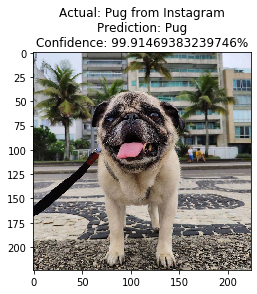

In [7]:
#pug on instagram
plt.figure()
test_image=Image.open("./test_images/pug_instagram.jpg").resize(dim)
test_image = np.array(test_image)/255.0
outputs = model.predict(test_image[np.newaxis, ...])
prediction = breeds[np.argmax(outputs[0], axis=-1)]
plt.imshow(test_image)
_=plt.title("Actual: Pug from Instagram"+"\nPrediction: " + prediction.title()+"\nConfidence: "+str(outputs[0][np.argmax(outputs[0], axis=-1)]*100)+"%")

In [8]:
#convert frozen model to tflite file
converter = tf.lite.TFLiteConverter.from_saved_model("./models/dog_adam_cc_10/")
tflite_model = converter.convert()
open("./models/tflite/converted_model.tflite", "wb").write(tflite_model)

9490020